<a href="https://colab.research.google.com/github/niteshsah3424/PYTHON_LAB/blob/main/6_week_pyrhonipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import deque


In [ ]:
grid = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (5, 5)


In [ ]:
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


In [ ]:
def get_neighbors(node, grid, allow_diagonal=False):
    directions = [(0,1),(1,0),(0,-1),(-1,0)]

    if allow_diagonal:
        directions += [(1,1),(1,-1),(-1,1),(-1,-1)]

    neighbors = []
    for dx, dy in directions:
        x, y = node[0] + dx, node[1] + dy

        if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
            if grid[x][y] == 0:
                cost = math.sqrt(2) if allow_diagonal and dx != 0 and dy != 0 else 1
                neighbors.append(((x, y), cost))

    return neighbors


In [ ]:
def a_star(grid, start, goal, heuristic, allow_diagonal=False):
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_cost = {start: 0}
    nodes_explored = 0

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_explored += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_cost[goal], nodes_explored

        for neighbor, move_cost in get_neighbors(current, grid, allow_diagonal):
            new_cost = g_cost[current] + move_cost

            if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_cost
                f_cost = new_cost + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_cost, neighbor))
                came_from[neighbor] = current

    return None, float('inf'), nodes_explored


In [ ]:
def bfs(grid, start, goal, allow_diagonal=False):
    queue = deque([start])
    visited = {start}
    came_from = {}
    nodes_explored = 0

    while queue:
        current = queue.popleft()
        nodes_explored += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, len(path)-1, nodes_explored

        for neighbor, _ in get_neighbors(current, grid, allow_diagonal):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                came_from[neighbor] = current

    return None, float('inf'), nodes_explored


In [ ]:
def ucs(grid, start, goal, allow_diagonal=False):
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    cost_so_far = {start: 0}
    nodes_explored = 0

    while open_list:
        current_cost, current = heapq.heappop(open_list)
        nodes_explored += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, cost_so_far[goal], nodes_explored

        for neighbor, move_cost in get_neighbors(current, grid, allow_diagonal):
            new_cost = cost_so_far[current] + move_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(open_list, (new_cost, neighbor))
                came_from[neighbor] = current

    return None, float('inf'), nodes_explored


In [ ]:
def plot_path(grid, path, title):
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap='gray_r')

    if path:
        x = [p[1] for p in path]
        y = [p[0] for p in path]
        plt.plot(x, y, marker='o')

    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


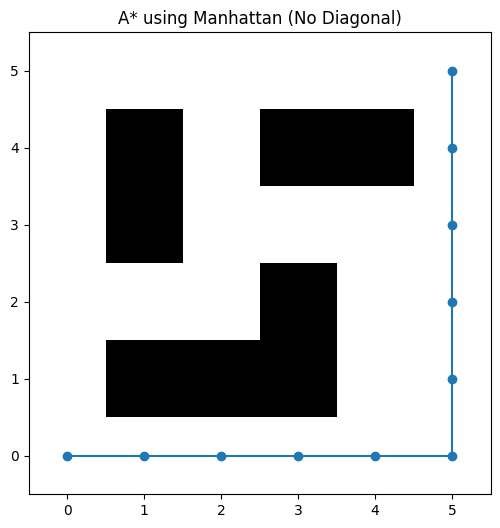

In [ ]:
a_path_m, a_cost_m, a_nodes_m = a_star(grid, start, goal, manhattan, False)
plot_path(grid, a_path_m, "A* using Manhattan (No Diagonal)")


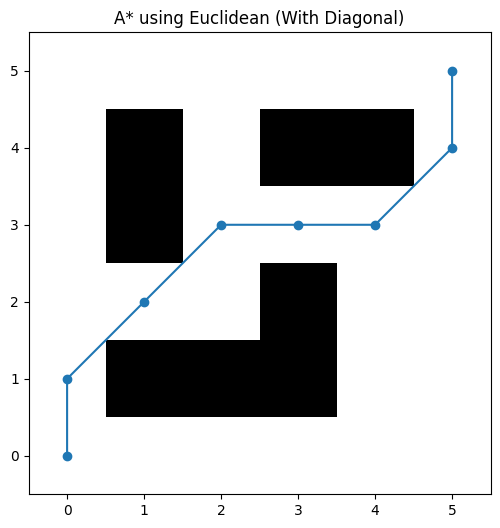

In [ ]:
a_path_e, a_cost_e, a_nodes_e = a_star(grid, start, goal, euclidean, True)
plot_path(grid, a_path_e, "A* using Euclidean (With Diagonal)")


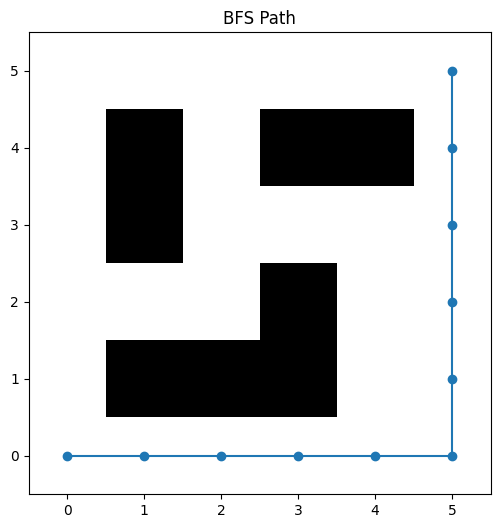

In [ ]:
b_path, b_cost, b_nodes = bfs(grid, start, goal, False)
plot_path(grid, b_path, "BFS Path")


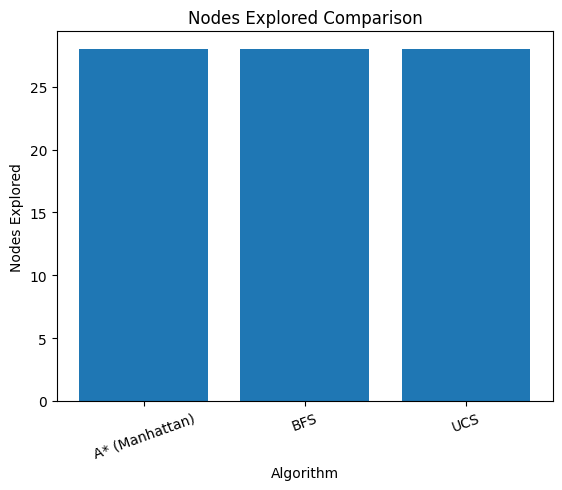

In [ ]:
algorithms = ["A* (Manhattan)", "BFS", "UCS"]
costs = [a_cost_m, b_cost, ucs(grid, start, goal, False)[1]]
nodes = [a_nodes_m, b_nodes, ucs(grid, start, goal, False)[2]]

plt.figure()
plt.bar(algorithms, nodes)
plt.title("Nodes Explored Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Nodes Explored")
plt.xticks(rotation=20)
plt.show()
